# CNN DIGIT CLASSIFICATION

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

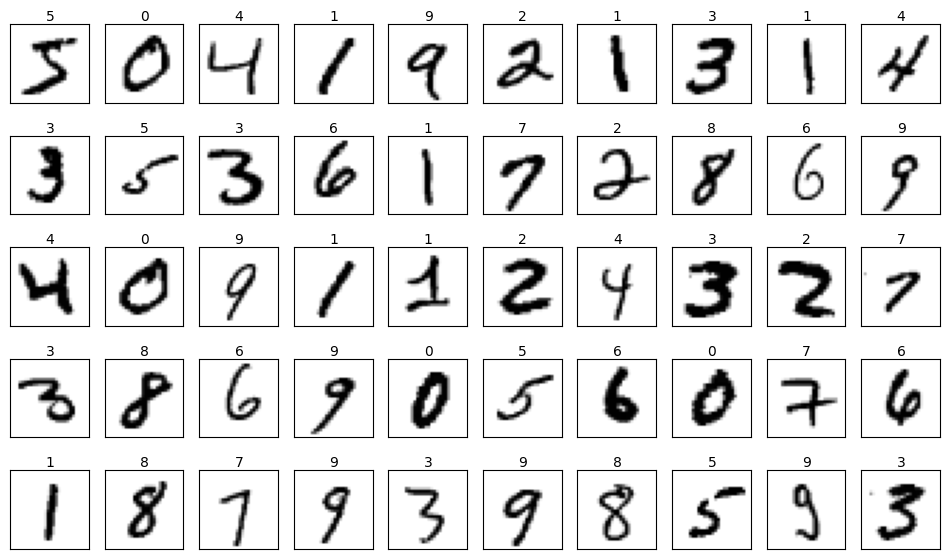

In [ ]:
# 1. Visualization the first 50 images
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

fig, axes = plt.subplots(5, 10, figsize=(12,7), subplot_kw={'xticks':[], 'yticks':[]})

for i, ax in enumerate(axes.flat):
  ax.imshow(x_train[i], cmap=plt.cm.gray_r)
  ax.text(0.45, 1.05, str(y_train[i]), transform=ax.transAxes)
plt.show()

In [ ]:
# //we can also try on fashion_mnist dataset

In [ ]:
# 2. Preprocess the data
x_train = x_train.astype("float32") /255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
# 3. Define the CNN model
model = keras.models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 4. Train the model (without displaying epochs)

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=0) # Set verbosee=0

In [ ]:
# 5. Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0) # Set verbose=0
print('Test accuracy:', accuracy)

Test accuracy: 0.9907000064849854


In [ ]:
# //If error will show then run all the code in a single cell

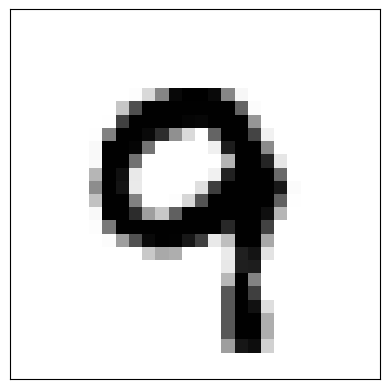

In [ ]:
# 6. Display a test image and make a prediction
test_image = x_test[99]
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False,
                right=False, labelbottom=False, labelleft=False)

plt.imshow(test_image.reshape(28,28), cmap=plt.cm.gray_r)
plt.show()

In [ ]:
# 7
predicted_class = np.argmax(model.predict(test_image.reshape(1, 28, 28, 1)), axis=1)
print('Looks like a ' + str(predicted_class) + '!')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Looks like a [9]!


# 12 12 2024

# Image classification cnn

In [ ]:
# Import TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [ ]:
# Normalize pixel values to be between 0 and 1.
train_images, test_images = train_images / 255.0, test_images/ 255.0

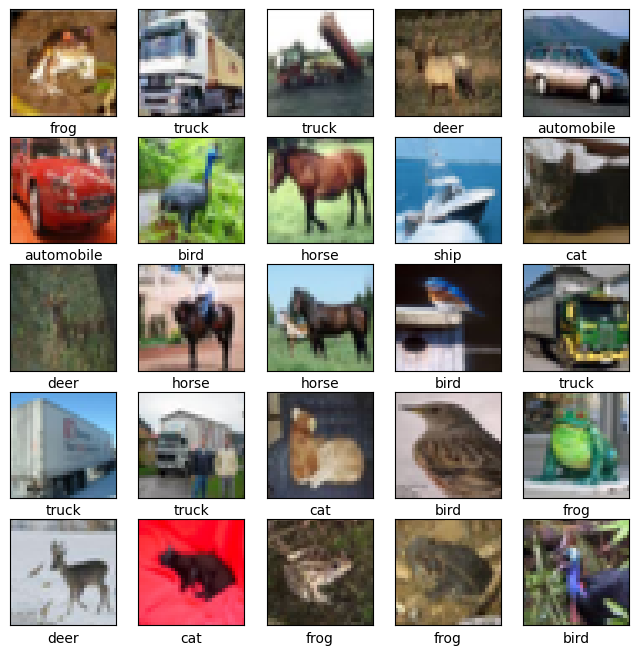

In [ ]:

class_names = ['airplane', 'automobile', 'bird', 'cat',
               'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# 2. Visualize the first 25 images in the training set
plt.figure(figsize=(8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  # The CIFAR labels happen to be arrays,
  # which i swhy we need the extra index
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
# 3. Build the Convolutional Neural Network (CNN) model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10) # Output layer for 10 classes
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])

history = model.fit(train_images, train_labels, epochs = 10, validation_data = (test_images, test_labels), verbose = 0)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)

In [ ]:
# 4. Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# An epoch means training the neural network with all the training data for on ecycle. Here i use 10 epochs
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels), verbose = 0)

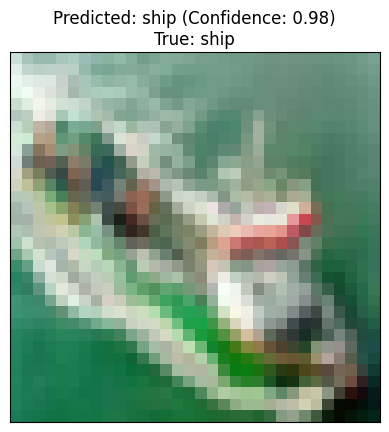

Predicted: ship
True Label: ship
Confidence Scores:
airplane: -0.1826
automobile: 2.2785
bird: 1.0258
cat: -0.0023
deer: -2.7308
dog: -3.1446
frog: 0.3417
horse: -11.0389
ship: 6.5084
truck: -3.4151


In [ ]:
 def predict_single_image(model, image_index):
  # Extract the test image and its true label
  img = test_images[image_index]
  true_label = test_labels[image_index][0]

  # Expand dimensions to match model input requirements [batch size]
  img_expanded = np.expand_dims(img, axis=0)

  # Get predictions
  predictions = model.predict (img_expanded, verbose=0)
  predicted_label = np.argmax(predictions[0])
  confidence = tf.nn.softmax(predictions[0])

  # Display the image and prediction result
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.title(f"Predicted: {class_names[predicted_label]} (Confidence: {confidence[predicted_label]:.2f})\n"
  f"True: {class_names[true_label]}")
  plt.show()
  ## Print detailed confidence scoreprint(f"Predicted Label:{class_names[predicted_label]}"")
  print(f"Predicted: {class_names[predicted_label]}")
  print(f"True Label: {class_names[true_label]}")
  print("Confidence Scores:")
  for i, score in enumerate(predictions[0]):
    print(f"{class_names[i]}: {score:.4f}")

# 7 use the function tot test predictions on a single image
image_index = 15 # change this index to test other images
predict_single_image(model, image_index)

In [ ]:
# red vine
# ship
# housing
# iris
# ban in industry